In [2]:
# pip install -U scikit-learn

In [3]:
# Cell 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For nicer plots
sns.set(style="whitegrid")

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [4]:
# Cell 2: Load the Boston Housing dataset from CSV and fix column names
boston_df = pd.read_csv("BostonHousing.csv")
# Remove any extra whitespace from the column names
boston_df.columns = boston_df.columns.str.strip()

# Verify the columns
print("Columns in the dataset:", boston_df.columns.tolist())
boston_df.head()


Columns in the dataset: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0.0,0.47,7.19,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,0.07,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2


Summary Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613419,11.363636,11.136779,0.069170,0.554763,6.285217,68.574901,3.795435,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601602,23.322453,6.860353,0.253994,0.115507,0.702853,28.148861,2.105776,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.010000,0.000000,0.460000,0.000000,0.390000,3.560000,2.900000,1.130000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.080000,0.000000,5.190000,0.000000,0.450000,5.890000,45.025000,2.100000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.255000,0.000000,9.690000,0.000000,0.540000,6.210000,77.500000,3.210000,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677500,12.500000,18.100000,0.000000,0.620000,6.627500,94.075000,5.187500,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.980000,100.000000,27.740000,1.000000,0.870000,8.780000,100.000000,12.130000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


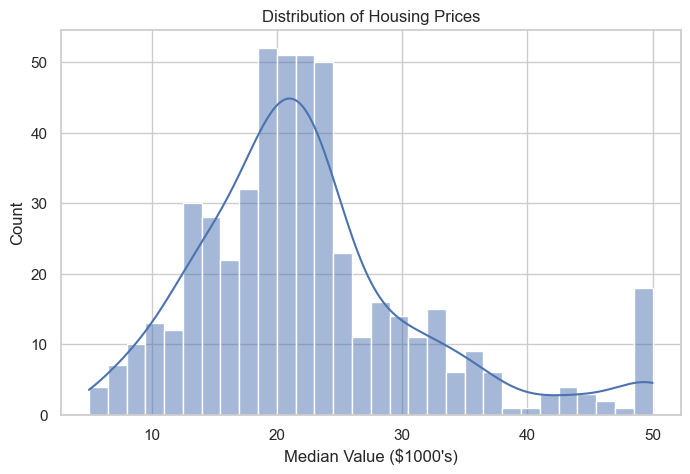

Mean of MEDV: 22.532806324110677


In [5]:
# Cell 3: Summary statistics of the dataset (including MEDV)
print("Summary Statistics:")
display(boston_df.describe())

# Plot the distribution of housing prices (MEDV)
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['MEDV'], bins=30, kde=True)
plt.xlabel('Median Value ($1000\'s)')
plt.title('Distribution of Housing Prices')
plt.show()

# Compute the mean housing price
mean_price = boston_df['MEDV'].mean()
print("Mean of MEDV:", mean_price)

In [6]:
# Cell 4: Compare a randomly selected observation with the mean prediction.
# np.random.seed(42)
n_iterations = 1000
# n_iterations = 1
errors = []

for _ in range(n_iterations):
    # Randomly select one observation's price
    random_price = boston_df['MEDV'].sample(n=1).values[0]
    error = abs(random_price - mean_price)
    errors.append(error)

avg_baseline_error = np.mean(errors)
print("Average absolute error when predicting the mean:", avg_baseline_error)


Average absolute error when predicting the mean: 6.355086166007906


Correlation between RM and MEDV:


,RM,MEDV
RM,1.00000,0.69543
MEDV,0.69543,1.00000


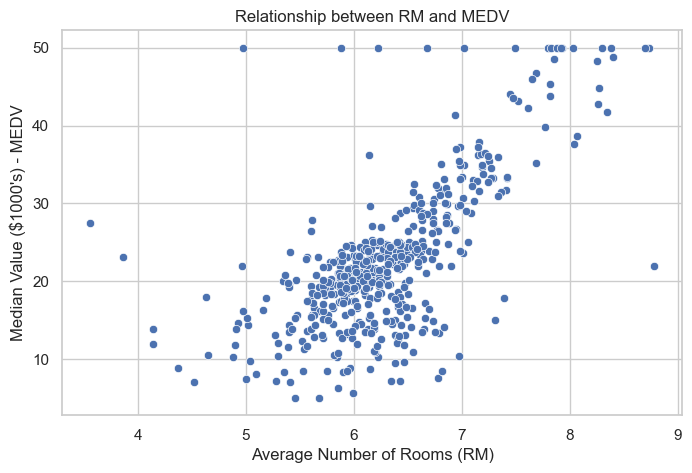

In [7]:
# Cell 5: Calculate and display the correlation between RM and MEDV
corr_rm_medv = boston_df[['RM', 'MEDV']].corr()
print("Correlation between RM and MEDV:")
display(corr_rm_medv)

# Plot RM vs MEDV
plt.figure(figsize=(8, 5))
sns.scatterplot(x='RM', y='MEDV', data=boston_df)
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value ($1000's) - MEDV")
plt.title("Relationship between RM and MEDV")
plt.show()


In [8]:
# OLS Manually
import numpy as np
import pandas as pd

# Load the dataset (assumes your CSV file has a header row)
boston_df = pd.read_csv("BostonHousing.csv")
# In case there is extra whitespace in column names, remove it:
boston_df.columns = boston_df.columns.str.strip()

# Extract the predictor (RM) and response (MEDV)
# Make sure these column names exactly match your CSV file.
X = np.c_[np.ones(len(boston_df)), boston_df['RM'].values]  # Design matrix with intercept term
y = boston_df['MEDV'].values

# Compute the OLS coefficients using the normal equation:
# beta = (X'X)^(-1) X'y
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Coefficients:")
print("Intercept (beta0):", beta[0])
print("Slope (beta1):", beta[1])

# Compute the predicted values
y_pred = X.dot(beta)

# Compute Total Sum of Squares (SST)
y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2)

# Compute Regression Sum of Squares (SSR)
SSR = np.sum((y_pred - y_mean)**2)

# Alternatively, you could compute the Sum of Squared Errors (SSE)
SSE = np.sum((y - y_pred)**2)

# Compute R-squared: either SSR/SST or 1 - SSE/SST
R_squared = SSR / SST
# R_squared_alternative = 1 - (SSE / SST)

print("\nSum of Squares:")
print("SSR (Regression Sum of Squares):", SSR)
print("SST (Total Sum of Squares):", SST)
print("\nR-squared:", R_squared)


Coefficients:
Intercept (beta0): -34.66245561770526
Slope (beta1): 9.099965582884378

Sum of Squares:
SSR (Regression Sum of Squares): 20658.572527774508
SST (Total Sum of Squares): 42716.29541501977

R-squared: 0.4836227563055622


In [13]:
# --- Random Price Draw Comparison ---

# Single random observation comparison
rand_idx = np.random.randint(0, len(boston_df))
actual_price = y[rand_idx]
# Create the feature vector (with intercept) for this observation:
x_val = np.array([1, boston_df['RM'].iloc[rand_idx]])
ols_prediction = x_val.dot(beta)
mean_prediction = np.mean(y)

print("\n--- Single Random Draw ---")
print("Random observation index:", rand_idx)
print("Actual Price:         {:.2f}".format(actual_price))
print("Mean Prediction:      {:.2f}".format(mean_prediction))
print("OLS Prediction:       {:.2f}".format(ols_prediction))
print("Error using mean:     {:.2f}".format(abs(actual_price - mean_prediction)))
print("Error using OLS:      {:.2f}".format(abs(actual_price - ols_prediction)))

# Multiple random draws to compare average performance:
n_iterations = 1000
errors_mean = []
errors_ols = []

for _ in range(n_iterations):
    idx = np.random.randint(0, len(boston_df))
    actual = y[idx]
    # Prediction using OLS for the given RM:
    x_row = np.array([1, boston_df['RM'].iloc[idx]])
    pred_ols = x_row.dot(beta)
    
    errors_mean.append(abs(actual - mean_prediction))
    errors_ols.append(abs(actual - pred_ols))

avg_error_mean = np.mean(errors_mean)
avg_error_ols = np.mean(errors_ols)

print("\n--- Over {} Random Draws ---".format(n_iterations))
print("Average absolute error using mean prediction: {:.2f}".format(avg_error_mean))
print("Average absolute error using OLS prediction:  {:.2f}".format(avg_error_ols))


--- Single Random Draw ---
Random observation index: 469
Actual Price:         20.10
Mean Prediction:      22.53
OLS Prediction:       17.30
Error using mean:     2.43
Error using OLS:      2.80

--- Over 1000 Random Draws ---
Average absolute error using mean prediction: 6.84
Average absolute error using OLS prediction:  4.58


In [14]:
# Cell 6: Fit an OLS model with MEDV as the response and RM as the predictor.
X_sm = sm.add_constant(boston_df['RM'])  # add intercept term
ols_model = sm.OLS(boston_df['MEDV'], X_sm).fit()

# Print the full summary including coefficients, p-values, SSR, SST, R², and adjusted R².
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     472.0
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           2.37e-74
Time:                        13:32:04   Log-Likelihood:                -1673.0
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6625      2.649    -13.086      0.0

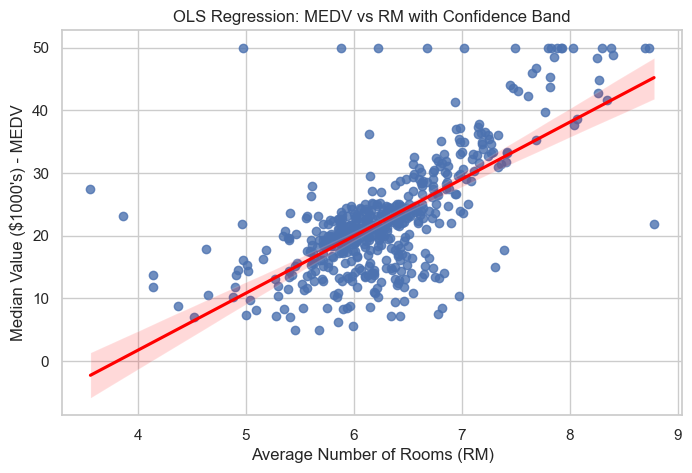

In [15]:
# Cell 7: Plot regression line with a 95% confidence interval using seaborn's regplot
plt.figure(figsize=(8, 5))
sns.regplot(x='RM', y='MEDV', data=boston_df, ci=95, line_kws={'color': 'red'})
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value ($1000's) - MEDV")
plt.title("OLS Regression: MEDV vs RM with Confidence Band")
plt.show()


In [16]:
# Cell 8: Using sklearn to build a linear regression model with RM as the predictor.
X = boston_df[['RM']]
y = boston_df['MEDV']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Create and fit the model
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)

# Make predictions on the testing set
pred = lin_reg_mod.predict(X_test)

# Evaluate the model: compute RMSE and R²
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
test_set_r2 = r2_score(y_test, pred)

print("Scikit-Learn Linear Regression results using RM as predictor:")
print("Test set RMSE:", test_set_rmse)
print("Test set R²:", test_set_r2)


Scikit-Learn Linear Regression results using RM as predictor:
Test set RMSE: 7.404696043686195
Test set R²: 0.4581364828753982


In [17]:
# Cell 9: Compute Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print("Evaluation Metrics for RM-only Model:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Evaluation Metrics for RM-only Model:
Mean Squared Error (MSE): 54.829523499381985
Mean Absolute Error (MAE): 5.332675369032686


In [18]:
# Cell 10: Fit a multiple linear regression model using Statsmodels with additional predictors.
# Here we use 'RM', 'LSTAT', and 'PTRATIO'.
predictors = ['RM', 'LSTAT', 'PTRATIO']
X_mult = sm.add_constant(boston_df[predictors])
ols_mult_model = sm.OLS(boston_df['MEDV'], X_mult).fit()

print("Multiple Linear Regression Model Summary (Statsmodels):")
print(ols_mult_model.summary())


Multiple Linear Regression Model Summary (Statsmodels):
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.4
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          2.67e-123
Time:                        13:32:05   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [19]:
# Cell 11: Using scikit-learn with multiple predictors (LSTAT and RM).
X_ml = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns=['LSTAT', 'RM'])
y_ml = boston_df['MEDV']

# Split the data (20% test set)
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=9)

# Instantiate and fit the model
lin_reg_ml = LinearRegression()
lin_reg_ml.fit(X_train_ml, y_train_ml)

# Make predictions on the test set
pred_ml = lin_reg_ml.predict(X_test_ml)

# Evaluate the model
test_set_rmse_ml = np.sqrt(mean_squared_error(y_test_ml, pred_ml))
test_set_r2_ml = r2_score(y_test_ml, pred_ml)

print("Scikit-Learn Multiple Linear Regression results using LSTAT and RM:")
print("Test set RMSE:", test_set_rmse_ml)
print("Test set R²:", test_set_r2_ml)

# To improve the model further, consider:
# - Adding additional features from the dataset.
# - Using cross-validation for robust evaluation.
# - Applying regularization techniques (e.g., Ridge, Lasso) to handle multicollinearity.


Scikit-Learn Multiple Linear Regression results using LSTAT and RM:
Test set RMSE: 6.034926629974265
Test set R²: 0.6400688541787949
